# **Mini Capstone Project**

A fictional telco company that provided home phone and 




Internet services to 7043 customers in California in Quarter 3 of the fiscal year.

**Data Description**

7043 observations with 33 variables
*   CustomerID: A unique ID that identifies each customer.
 
*   Count: A value used in reporting/dashboarding to sum up the number of customers in a filtered set.

*   Country: The country of the customer’s primary residence.

*   State: The state of the customer’s primary residence.

*  City: The city of the customer’s primary residence.
*  Zip Code: The zip code of the customer’s primary residence.
* Lat Long: The combined latitude and longitude of the customer’s primary residence.
* Latitude: The latitude of the customer’s primary residence.
* Longitude: The longitude of the customer’s primary residence.

* Longitude: The longitude of the customer’s primary residence.
* Gender: The customer’s gender: Male, Female

* Senior Citizen: Indicates if the customer is 65 or older: Yes, No
* Partner: Indicate if the customer has a partner: Yes, No
* Dependents: Indicates if the customer lives with any 
* dependents: Yes, No. Dependents could be children, parents, grandparents, etc.
* Tenure Months: Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.
* Phone Service: Indicates if the customer subscribes to home phone service with the company: Yes, No
* Multiple Lines: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No
* Internet Service: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.
* Online Security: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No

* Online Backup: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No

* Device Protection: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No

* Tech Support: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No

*   Streaming TV: Indicates if the customer uses their Internet service to stream television programming from a third party provider: Yes, No. The company does not charge an additional fee for this service.

* Streaming Movies: Indicates if the customer uses their Internet service to stream movies from a third party 
*  provider: Yes, No. The company does not charge an additional fee for this service.
*  Contract: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.

* Paperless Billing: Indicates if the customer has chosen paperless billing: Yes, No

* Payment Method: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check

*   Monthly Charge: Indicates the customer’s current total monthly charge for all their services from the company.

*  Total Charges: Indicates the customer’s total charges, calculated to the end of the quarter specified above.

* Churn Label: Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.

* Churn Value: 1 = the customer left the company this quarter. 0 = the customer remained with the company. Directly related to Churn Label.

*  Churn Score: A value from 0-100 that is calculated using the predictive tool IBM SPSS Modeler. The model incorporates multiple factors known to cause churn. The higher the score, the more likely the customer will churn.

*  CLTV: Customer Lifetime Value. A predicted CLTV is calculated using corporate formulas and existing data. The higher the value, the more valuable the customer. High value customers should be monitored for churn.

* Churn Reason: A customer’s specific reason for leaving the company. Directly related to Churn Category.




















In [185]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import DataFrame


In [186]:
Telco=pd.read_excel('/content/Telco_customer_churn.xlsx')
Telco

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN


In [152]:
Telco= pd.read_excel("/content/Telco_customer_churn.xlsx")
df= DataFrame(Telco)

In [187]:
Telco.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [188]:
Telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [189]:
Telco['Total Charges'] = pd.to_numeric(Telco['Total Charges'], errors = 'coerce')

**PART 1**

**1.Please read the file and explain data types statistically as well as how python is reading it. Please let us know if any data type is read wrong.** 

Ans:- From this output, we can see that the total_charges attribute has object data type. So, I will change it to numeric.

Before converting to numeric data type, since I had already explored this dataset, let's check the total_charges attribute where the tenure attribute is 0.

In [190]:
df['Total Charges'].isna().sum()

0

In [191]:
df.loc[488, 'Total Charges']

4338.6

In [192]:
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')
df['Total Charges'].isna().sum()

0

In [193]:
df['Total Charges'].fillna(0, inplace=True)
df['Total Charges'].isna().sum()

0

In [127]:
Telco = pd.DataFrame(Telco.dtypes).T.rename({0:'python data types'})
Telco

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
python data types,object,float64,object,object,object,float64,object,float64,float64,object,...,object,object,object,float64,float64,object,float64,float64,float64,object


**2.Please apply appropriate statistical measures using python based on data types.**

ANS:-

In [176]:
Telco.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


**3.What is the percentage of females and senior citizens in this data set? Please create appropriate plots and explain the plots.**

Ans:-percentage  of females  are 49.52% and senior citizen are 16.21%

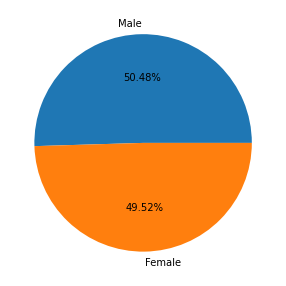

In [194]:
plt.figure(figsize=(10,5))
plt.pie(Telco['Gender'].value_counts(), labels=Telco['Gender'].unique(), autopct='%.2f%%')
plt.show()

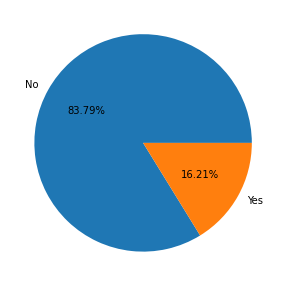

In [195]:
plt.figure(figsize=(10,5))
plt.pie(Telco['Senior Citizen'].value_counts(), labels=Telco['Senior Citizen'].unique(), autopct='%.2f%%')
plt.show()

**4.Please create an appropriate plot to examine the distribution of the tenure month column and explain the distribution. Based on distribution, perform appropriate statistical measures. Please also explain if the variable is symmetric or skewed. Please calculate it. Explain everything as asked.**

ANS:-From the visualization above, we can see that, the longer a person uses the provider, the probability of churn decreases.

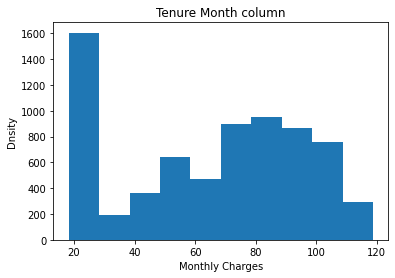

In [196]:
plt.hist(Telco["Monthly Charges"])
plt.title("Tenure Month column")
plt.xlabel("Monthly Charges")
plt.ylabel("Dnsity")
plt.grid(False)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


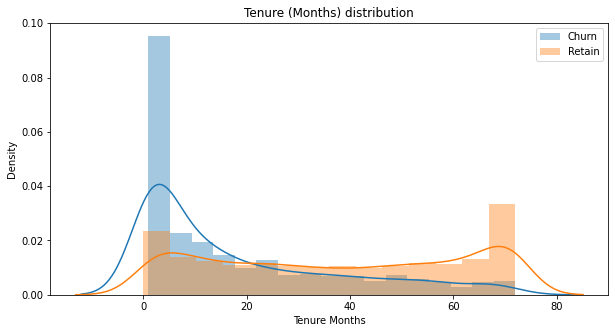

In [197]:
plt.figure(figsize=(10,5))
plt.title('Tenure (Months) distribution')
sns.distplot(Telco[Telco['Churn Label'] == 'Yes']['Tenure Months'], label='Churn')
sns.distplot(Telco[Telco['Churn Label'] == 'No']['Tenure Months'], label='Retain')
plt.legend(loc= 'upper right')
plt.show()

**5.Please convert all binary columns into 0 and 1 using appropriate programming constructs, not one by one.**

In [198]:
Telco.replace({'Yes':1,'No':0},inplace=True) #replacing all the yes and no values with it 1 and 0
Telco['Gender'].replace({'Male':1,'Female':0},inplace= True) #replacing Male and Female as 1 and 0
Telco

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,1,...,Month-to-month,1,Mailed check,53.85,108.15,1,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,0,...,Month-to-month,1,Electronic check,70.70,151.65,1,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,0,...,Month-to-month,1,Electronic check,99.65,820.50,1,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,0,...,Month-to-month,1,Electronic check,104.80,3046.05,1,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,1,...,Month-to-month,1,Bank transfer (automatic),103.70,5036.30,1,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,0,...,Two year,1,Bank transfer (automatic),21.15,1419.40,0,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,1,...,One year,1,Mailed check,84.80,1990.50,0,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,0,...,One year,1,Credit card (automatic),103.20,7362.90,0,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,0,...,Month-to-month,1,Electronic check,29.60,346.45,0,0,59,2793,NaN


**6.Please examine the distribution of monthly charges between males and females using box plots. Please explain the results also.**

ans:-From the visualization above, the odds between men and women to churn is almost the same in every level of monthly charges.

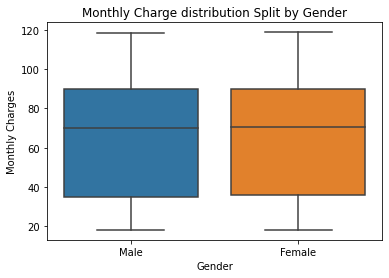

In [199]:
plt.title('Monthly Charge distribution Split by Gender')
sns.boxplot(x=df['Gender'], y=df['Monthly Charges'])
plt.show()

In [202]:
df.groupby('Gender')['Monthly Charges'].median()

Gender
Female    70.65
Male      70.10
Name: Monthly Charges, dtype: float64

**7.Please find what is the minimum total charges for Los Angeles city. Please find which zip code has the maximum total charges**

Ans:-

In [203]:
df_La=df[df['City']=='Los Angeles']

#Minimum Total Charges fo Los Angeles
print("Minimum Total Charges for Los Angeles is :-", df_La['Total Charges'].min())

#Zip code with Maximum Total Charges in Los Angeles
df_zip=df_La[df_La['Total Charges']==df_La['Total Charges'].max()]
print("Zip Code with Maximum Total Charges:- ", df_zip['Zip Code'])

Minimum Total Charges for Los Angeles is :- 0.0
Zip Code with Maximum Total Charges:-  3117    90044
Name: Zip Code, dtype: int64


**8.Please find which payment method has the highest churn score and which has the lowest churn score.**

Ans:-Electronic check is the highest churn 
     and Credit card (Automatic) is the lowest churn

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


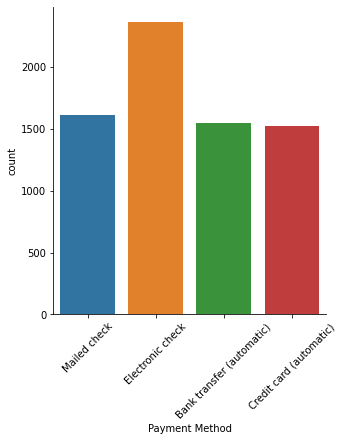

In [179]:
sns.catplot('Payment Method', kind='count', data=Telco)
plt.xticks(rotation=45)
plt.show()

In [204]:
df.groupby('Payment Method')['Churn Score'].sum()

Payment Method
Bank transfer (automatic)     86070
Credit card (automatic)       83989
Electronic check             152756
Mailed check                  90605
Name: Churn Score, dtype: int64

**9.Please create an appropriate plot to check the count of payment methods and explain it.**

ANS:-

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: Payment Method, dtype: int64

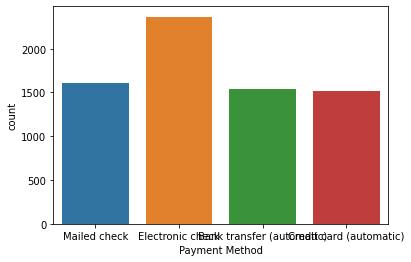

In [205]:
sns.countplot(df['Payment Method'])
df['Payment Method'].value_counts()

**10.Please create an appropriate plot to see the relationship between monthly charges and total charges.**

ANS:- The relation  between the Monthly Charges and Total Charges is  parllel to incresed same path.

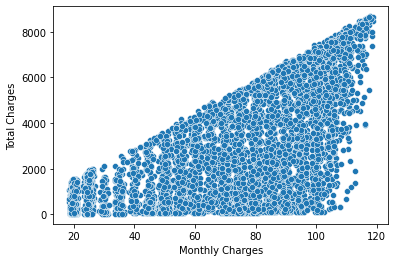

In [201]:
sns.scatterplot(x= "Monthly Charges", y= "Total Charges", data = Telco)